# Spanish Wine Quality Prediction using Linear/Polynomial Regression

## Project completed on 2023-07-25 by Hyscient Iyevhe Aleakhue

Regression, in simple terms, is a type of supervised machine learning task where the goal is to predict a continuous output variable based on input features. In contrast to classification, which predicts discrete classes, regression models aim to estimate a continuous numerical value.

The main objective of regression is to establish a relationship between the input features and the target variable, allowing us to make predictions on new data points. The output in regression can take any real value within a specific range, making it suitable for problems such as predicting prices, sales, temperatures, or any other measurable quantity.
Common regression algorithms include:

Linear Regression: A basic and widely used regression algorithm that models the relationship between the input features and the target variable as a linear equation.

* Polynomial Regression: An extension of linear regression that fits a polynomial equation to the data, capturing more complex relationships between the features and the target.

* Decision Tree Regression: A regression algorithm that uses a tree-like model to make predictions. It partitions the data into smaller subsets based on feature values and assigns a constant value to each subset.

* Random Forest Regression: An ensemble method that combines multiple decision trees to improve the accuracy and robustness of the regression predictions.

* Support Vector Regression (SVR): An adaptation of the Support Vector Machine (SVM) algorithm for regression tasks. SVR finds a hyperplane that best fits the data while allowing a certain degree of error.

* K-Nearest Neighbors (KNN) Regression: A simple algorithm that predicts the target value based on the average of the k-nearest data points in the feature space.

* Gradient Boosting Regression: A boosting algorithm that builds multiple weak learners sequentially to create a strong predictive model.
Some reputable sources where you can find more information about regression and regression algorithms:
* https://scikit-learn.org/stable/modules/linear_model.html
* https://towardsdatascience.com/polynomial-regression-bbe8b9d97491
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
* https://www.datacamp.com/tutorial/random-forests-classifier-python
* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
* https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
* https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab

### **Aim:**

The aim of this analysis is to predict wine prices based on various features using regression models.

### **Dataset Description:**
Spanish Wine Quality Dataset contains information on red variants of Spanish wines. The dataset comprises 7500 samples with 11 features that describe various aspects of the wines, including price, rating, and flavor descriptions. 


* **Winery:** Winery name
* **Wine:** Name of the wine
* **Year:** Year in which the grapes were harvested
* **Rating:** Average rating given to the wine by the users [from 1-5]
* **Num_reviews:** Number of users that reviewed the wine
* **Country:** Country of origin [Spain]
* **Region:** Region of the wine
* **Price:** Price in euros [€]
* **Type:** Wine variety
* **Body:** Body score, defined as the richness and weight of the wine in your mouth [from 1-5]
* **Acidity:** Acidity score, defined as wine's “pucker” or tartness; it's what makes a wine refreshing and your tongue salivate and want another sip 


Source: Fedesoriano. (April 2022). Spanish Wine Quality Dataset.  https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset

# *Contents*

    
1. Introduction
    * Importing necessary libraries
    * Loading the dataset

2. Exploratory Data Analysis (EDA)
    * Checking dataset details
    * Cleaning duplicated columns and handling missing values
    * Analyzing categorical and numerical variables
    * Exploring relationships and correlations

3. Data Preprocessing
    * Dropping rows with missing values
    * Creating new features

4. Linear Regression Model
    * Splitting data into training and testing sets
    * Training and evaluating Linear Regression

5. Polynomial Regression Model
    * Creating polynomial features
    * Training and evaluating Polynomial Regression

6. Regularized Regression Models
     * Scaling features
     * Ridge Regression
             * Hyperparameter tuning and evaluation
     * Random Forest Regression
            * Hyperparameter tuning and evaluation
            * Saving the best model

7. Additional Evaluation Metrics
        Calculating MAE, RMSE, Median Absolute Error

8. Saving Cleaned Data
     * Saving the preprocessed dataset to a CSV file

9. Alternative Model Approaches
     * Recursive Feature Elimination (RFE)
     * Lasso Regression
            * Training and evaluating Lasso Regression
     * Stacking Regressor
            * Creating and training Stacking Regressor

10. Conclusion

# 1. Introduction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from scipy import stats

In [3]:
# Load the dataset
wine_data = pd.read_csv('Wine-Quality.csv')

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is an essential initial step in data exploration, helping us understand and become familiar with the dataset. Its primary purpose is to gain insights, ask meaningful questions, and prepare the data for further analysis. Here's a breakdown of the key steps involved in performing EDA:

* Understanding the Dataset: This step involves getting an overview of the dataset by checking its size, data types, and previewing the first few rows. Understanding the structure of the dataset allows us to grasp its content and organization.

* Cleaning the Data: Data cleaning ensures the dataset's integrity and reliability. It involves handling duplicated column names and addressing missing values appropriately. Depending on the amount of missing data, we decide whether to remove or impute the missing values.

* Univariate Analysis: In this stage, we delve deeper into each variable of interest. We analyze categorical variables using value counts and summary statistics. For numerical variables, we examine their central tendencies and distributions through summary statistics and visualizations.

* Analysis of Relationships: Understanding the relationships between variables is crucial for drawing insights from the data. We employ various techniques like pair plots, box plots, and heatmaps to explore connections between variables and identify patterns or correlations.

* Modeling and Further Analysis: After completing EDA, we can proceed with building predictive models or conducting more in-depth analyses based on our findings. EDA helps us identify relevant features and potential challenges, laying the groundwork for subsequent modeling steps.

In [4]:
# previewing first 5 rows of data
print(wine_data.head())
# preview last 5 rows of data
print(wine_data.tail())

          winery           wine  year  rating  num_reviews country  \
0  Teso La Monja          Tinto  2013     4.9           58  Espana   
1         Artadi  Vina El Pison  2018     4.9           31  Espana   
2   Vega Sicilia          Unico  2009     4.8         1793  Espana   
3   Vega Sicilia          Unico  1999     4.8         1705  Espana   
4   Vega Sicilia          Unico  1996     4.8         1309  Espana   

             region   price                  type  body  acidity  
0              Toro  995.00              Toro Red   5.0      3.0  
1    Vino de Espana  313.50           Tempranillo   4.0      2.0  
2  Ribera del Duero  324.95  Ribera Del Duero Red   5.0      3.0  
3  Ribera del Duero  692.96  Ribera Del Duero Red   5.0      3.0  
4  Ribera del Duero  778.06  Ribera Del Duero Red   5.0      3.0  
                    winery             wine  year  rating  num_reviews  \
7495               Contino          Reserva  2016     4.2          392   
7496  Conreria d'Scala Dei   

In [5]:
# Check for missing values
missing_values = wine_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64


In [6]:
# Data types of each column
data_types = wine_data.dtypes
print("\nData Types:")
print(data_types)


Data Types:
winery          object
wine            object
year            object
rating         float64
num_reviews      int64
country         object
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object


In [7]:
# Summary statistics of numerical columns
summary_stats = wine_data.describe()
print("\nSummary Statistics:")
print(summary_stats)


Summary Statistics:
            rating   num_reviews        price         body      acidity
count  7500.000000   7500.000000  7500.000000  6331.000000  6331.000000
mean      4.254933    451.109067    60.095822     4.158427     2.946612
std       0.118029    723.001856   150.356676     0.583352     0.248202
min       4.200000     25.000000     4.990000     2.000000     1.000000
25%       4.200000    389.000000    18.900000     4.000000     3.000000
50%       4.200000    404.000000    28.530000     4.000000     3.000000
75%       4.200000    415.000000    51.350000     5.000000     3.000000
max       4.900000  32624.000000  3119.080000     5.000000     3.000000


In [9]:
# Drop rows with any missing values
wine_data_cleaned = wine_data.dropna()

# Print the shape of the cleaned DataFrame
print("Shape of Cleaned DataFrame:", wine_data_cleaned.shape)


Shape of Cleaned DataFrame: (6329, 11)


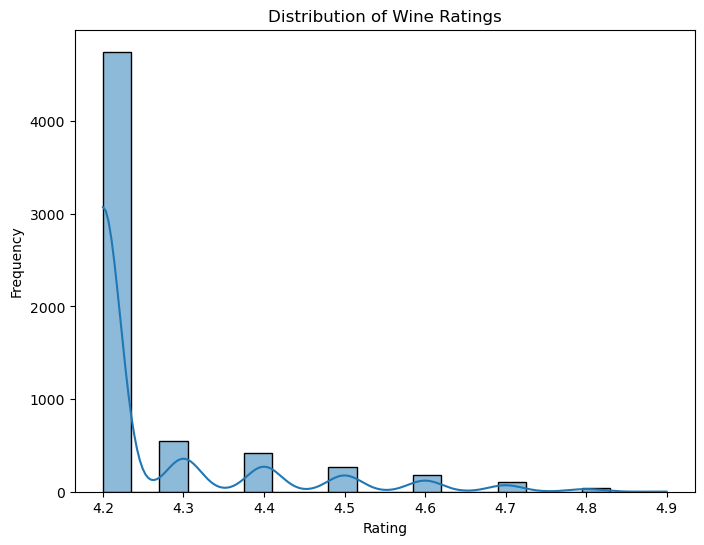

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualization 1: Histogram of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(data=wine_data_cleaned, x='rating', bins=20, kde=True)
plt.title('Distribution of Wine Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


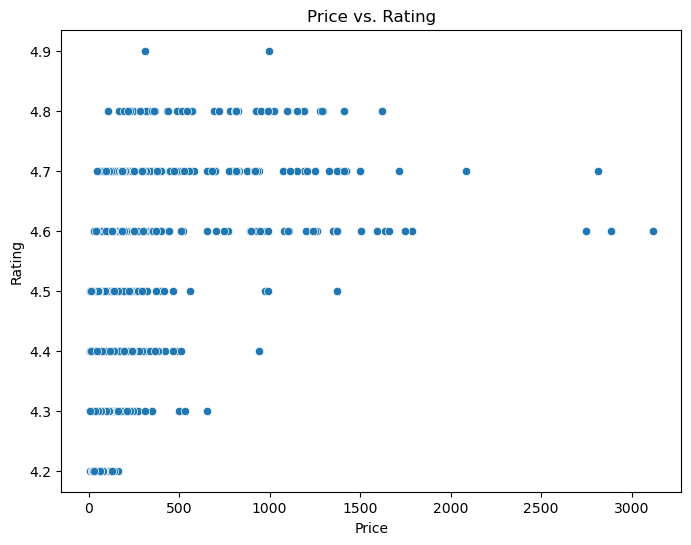

In [12]:
# Visualization 3: Scatter Plot of Price vs. Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=wine_data_cleaned, x='price', y='rating')
plt.title('Price vs. Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

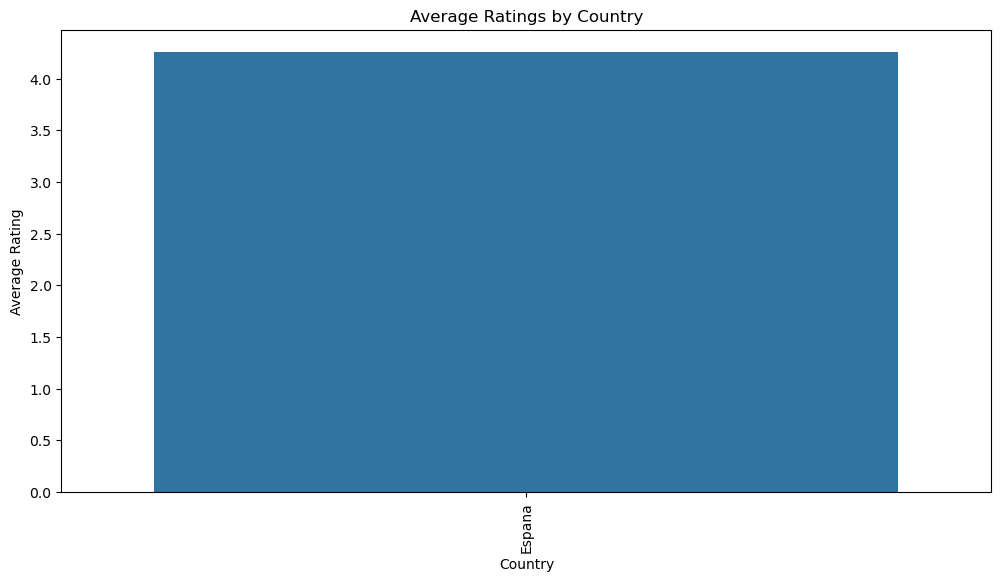

In [13]:
# Visualization 4: Bar Chart of Average Ratings by Country
plt.figure(figsize=(12, 6))
avg_ratings_by_country = wine_data_cleaned.groupby('country')['rating'].mean().sort_values(ascending=False)
sns.barplot(x=avg_ratings_by_country.index, y=avg_ratings_by_country.values)
plt.title('Average Ratings by Country')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

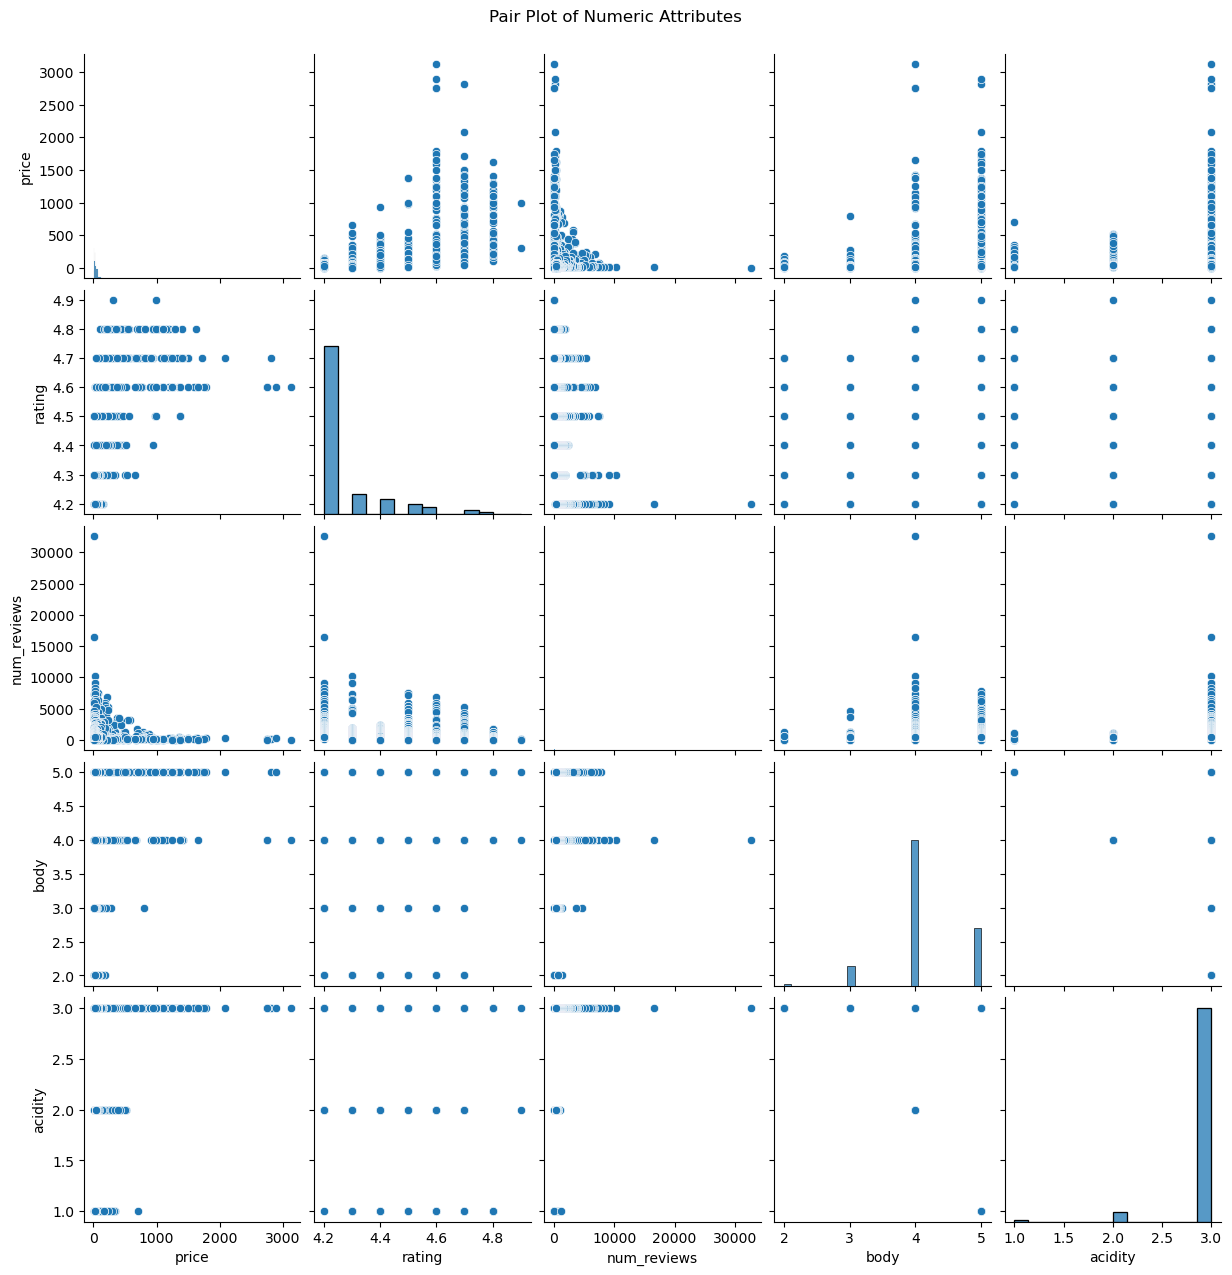

In [14]:
# Visualization 5: Pair Plot of Numeric Attributes
numeric_attributes = ['price', 'rating', 'num_reviews', 'body', 'acidity']
sns.pairplot(data=wine_data_cleaned[numeric_attributes])
plt.suptitle('Pair Plot of Numeric Attributes', y=1.02)
plt.show()

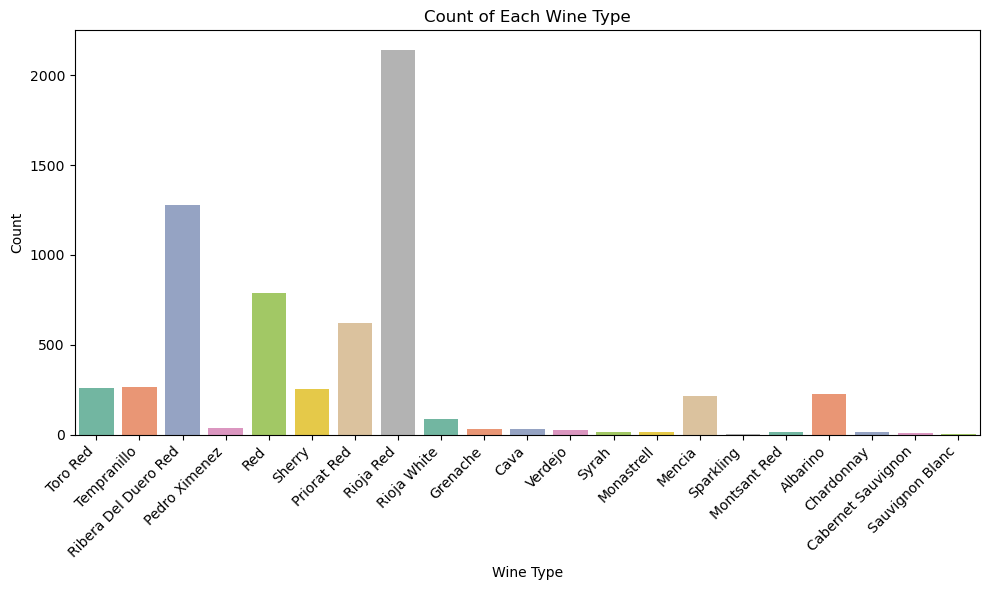

In [15]:
# Visualization 6: Count Plot of Wine Types 
plt.figure(figsize=(10, 6))  
sns.countplot(data=wine_data_cleaned, x='type', palette='Set2')
plt.title('Count of Each Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


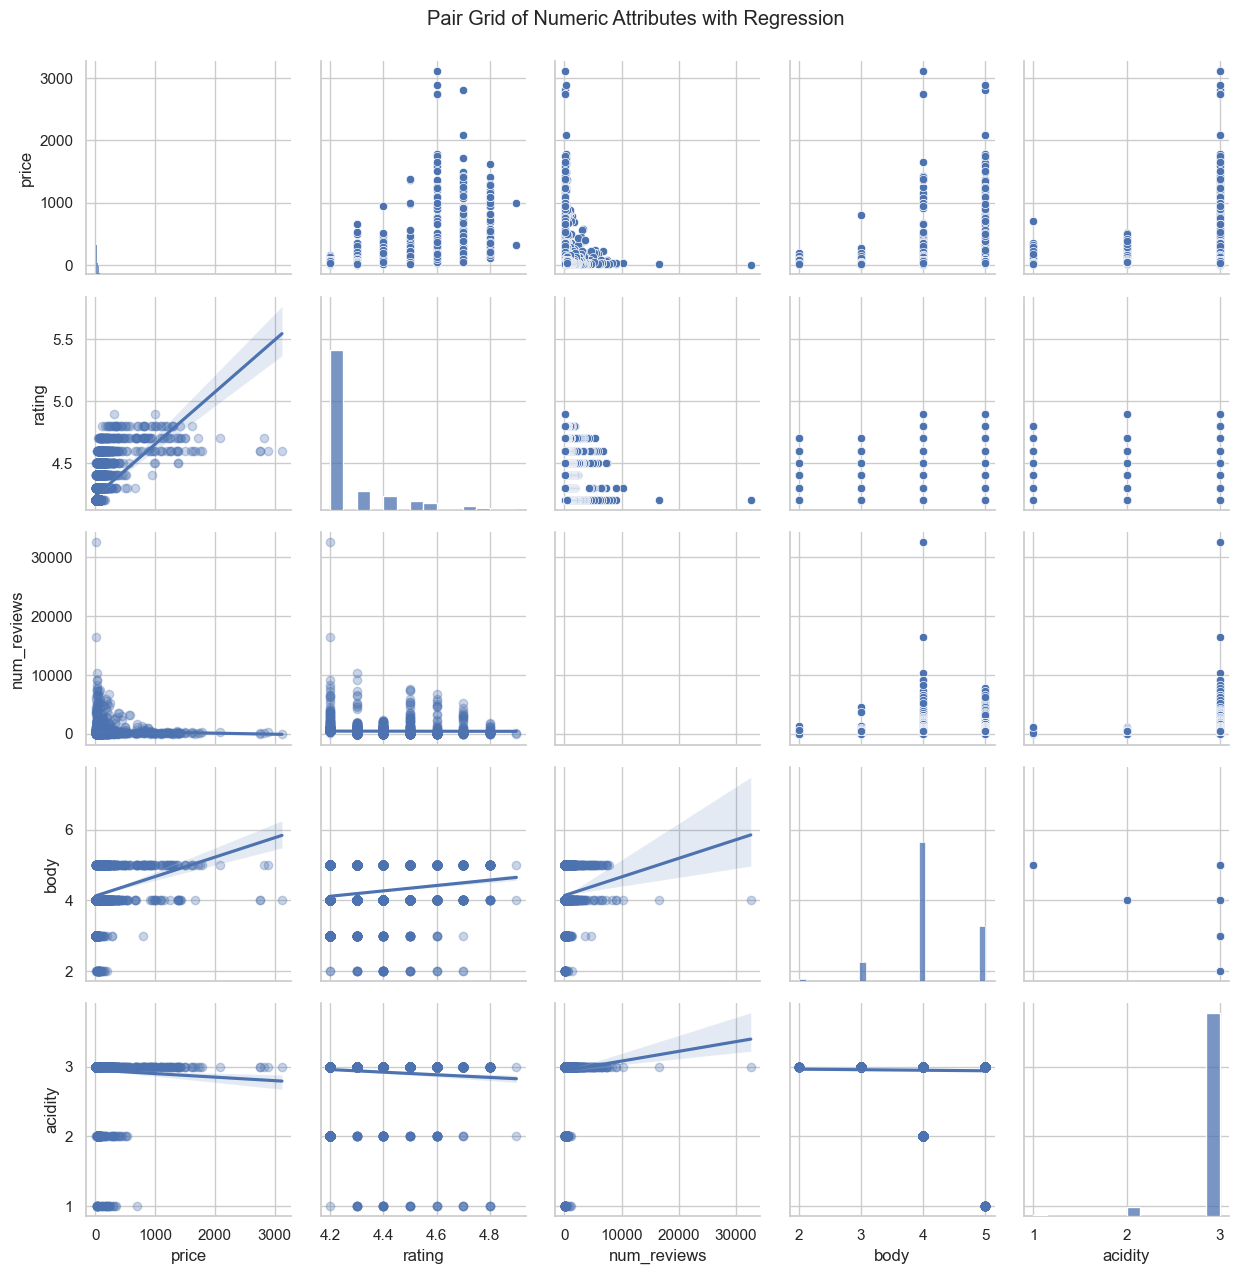

In [16]:
# Visualization 7: Pair Grid of Numeric Attributes with Regression
sns.set(style='whitegrid')
g = sns.PairGrid(wine_data_cleaned[numeric_attributes])
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot)
g.map_lower(sns.regplot, scatter_kws={'alpha': 0.3})
plt.suptitle('Pair Grid of Numeric Attributes with Regression', y=1.02)
plt.show()

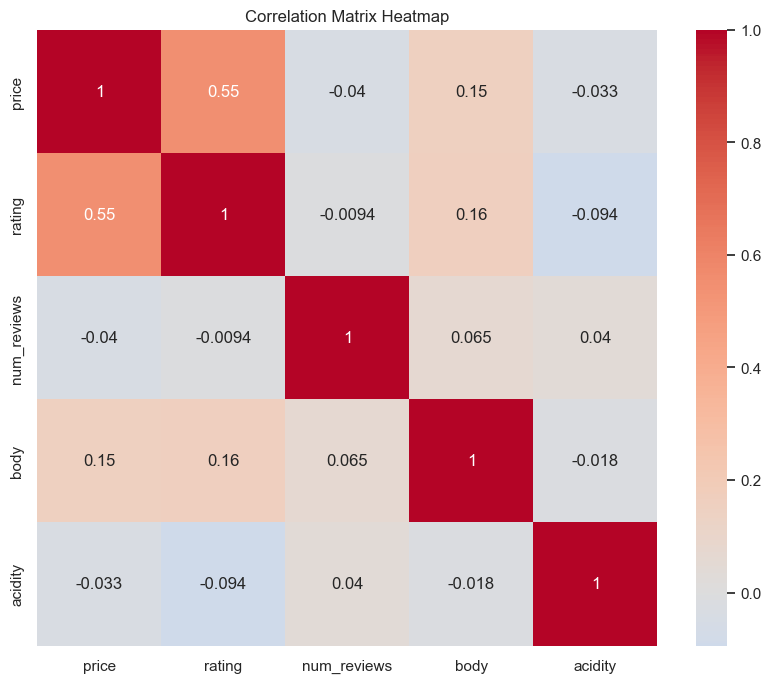

In [17]:
# Visualization 9: Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = wine_data_cleaned[numeric_attributes].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Model Selection for Linear Regression

In [18]:
# Model Training
X = wine_data_cleaned[['price', 'num_reviews', 'body', 'acidity']]
y = wine_data_cleaned['rating']

In [19]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create an instance of the RandomForestRegressor
model = RandomForestRegressor()

# Fit the model to your training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.004110291305954982


In [22]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


R-squared: 0.7719278256970322


# Model Comparison (Polynomial Regression)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already split your data into X_train, X_test, y_train, and y_test

# Create PolynomialFeatures and transform your features
degree = 2  # You can adjust the degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a Linear Regression model on the polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Make predictions using the trained model on the polynomial features
y_pred_poly = model_poly.predict(X_test_poly)

# Evaluate Polynomial Regression model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("\nPolynomial Regression Model Evaluation:")
print("Mean Squared Error:", mse_poly)
print("R-squared:", r2_poly)



Polynomial Regression Model Evaluation:
Mean Squared Error: 0.009336809585154352
R-squared: 0.48191835939857186


In [24]:
pd.options.mode.chained_assignment = None


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
wine_data = pd.read_csv('Wine-Quality.csv')

# Drop rows with missing values
wine_data_cleaned = wine_data.dropna()

# Feature Engineering: Create new features or try different combinations
wine_data_cleaned['reviews_per_price'] = wine_data_cleaned['num_reviews'] / wine_data_cleaned['price']
wine_data_cleaned['interaction'] = wine_data_cleaned['body'] * wine_data_cleaned['acidity']

# Model Selection for Linear Regression
X_linear = wine_data_cleaned[['price', 'num_reviews', 'body', 'acidity']]
y_linear = wine_data_cleaned['rating']

# Split the data into training and testing sets
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_linear, y_train_linear)

# Make predictions for Linear Regression model
y_pred_linear = linear_model.predict(X_test_linear)

# Evaluate Linear Regression model
mse_linear = mean_squared_error(y_test_linear, y_pred_linear)
r2_linear = r2_score(y_test_linear, y_pred_linear)

print("Linear Regression Model Evaluation:")
print("Mean Squared Error:", mse_linear)
print("R-squared:", r2_linear)

# Model Selection for Polynomial Regression
X_poly = wine_data_cleaned[['price', 'num_reviews', 'body', 'acidity', 'reviews_per_price', 'interaction']]
y_poly = wine_data_cleaned['rating']

# Split the data into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

# Initialize and train a Polynomial Regression model
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train_poly, y_train_poly)

# Make predictions for Polynomial Regression model
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate Polynomial Regression model
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print("\nPolynomial Regression Model Evaluation:")
print("Mean Squared Error:", mse_poly)
print("R-squared:", r2_poly)


Linear Regression Model Evaluation:
Mean Squared Error: 0.011861117537066031
R-squared: 0.34184935690021856

Polynomial Regression Model Evaluation:
Mean Squared Error: 0.008973187753655996
R-squared: 0.5020950368067414


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Regularized Polynomial Regression (Ridge)
ridge_model = Ridge(alpha=0.1)  # You can experiment with different alpha values
ridge_model.fit(X_train_scaled, y_train_poly)
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test_poly, y_pred_ridge)
r2_ridge = r2_score(y_test_poly, y_pred_ridge)

print("\nRidge Regression Model Evaluation:")
print("Mean Squared Error:", mse_ridge)
print("R-squared:", r2_ridge)

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train_poly)
y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test_poly, y_pred_rf)
r2_rf = r2_score(y_test_poly, y_pred_rf)

print("\nRandom Forest Regression Model Evaluation:")
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

# Hyperparameter Tuning for Random Forest using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_poly)
best_rf_model = grid_search.best_estimator_
best_rf_pred = best_rf_model.predict(X_test_scaled)
best_rf_mse = mean_squared_error(y_test_poly, best_rf_pred)
best_rf_r2 = r2_score(y_test_poly, best_rf_pred)

print("\nBest Random Forest Regression Model Evaluation:")
print("Mean Squared Error:", best_rf_mse)
print("R-squared:", best_rf_r2)



Ridge Regression Model Evaluation:
Mean Squared Error: 0.011609581169219747
R-squared: 0.3558066270936615

Random Forest Regression Model Evaluation:
Mean Squared Error: 0.003909786600403729
R-squared: 0.7830534469119562

Best Random Forest Regression Model Evaluation:
Mean Squared Error: 0.003749698211253348
R-squared: 0.7919364443144248


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Random Forest Model Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_poly, y_train_poly)

best_rf_model = grid_search.best_estimator_

# Make predictions for the tuned Random Forest model
y_pred_rf = best_rf_model.predict(X_test_poly)

# Evaluate the tuned Random Forest model
mse_rf = mean_squared_error(y_test_poly, y_pred_rf)
r2_rf = r2_score(y_test_poly, y_pred_rf)

print("\nTuned Random Forest Regression Model Evaluation:")
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)



Tuned Random Forest Regression Model Evaluation:
Mean Squared Error: 0.0037433957637540956
R-squared: 0.7922861550277511


In [28]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train a Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_poly, y_train_poly)

# Make predictions for the Gradient Boosting model
y_pred_gb = gb_model.predict(X_test_poly)

# Evaluate the Gradient Boosting model
mse_gb = mean_squared_error(y_test_poly, y_pred_gb)
r2_gb = r2_score(y_test_poly, y_pred_gb)

print("\nGradient Boosting Regression Model Evaluation:")
print("Mean Squared Error:", mse_gb)
print("R-squared:", r2_gb)



Gradient Boosting Regression Model Evaluation:
Mean Squared Error: 0.003874069672236926
R-squared: 0.7850353106924196


In [29]:
import joblib

# Save the tuned Random Forest model
model_filename = 'tuned_random_forest_model.pkl'
joblib.dump(best_rf_model, model_filename)


['tuned_random_forest_model.pkl']

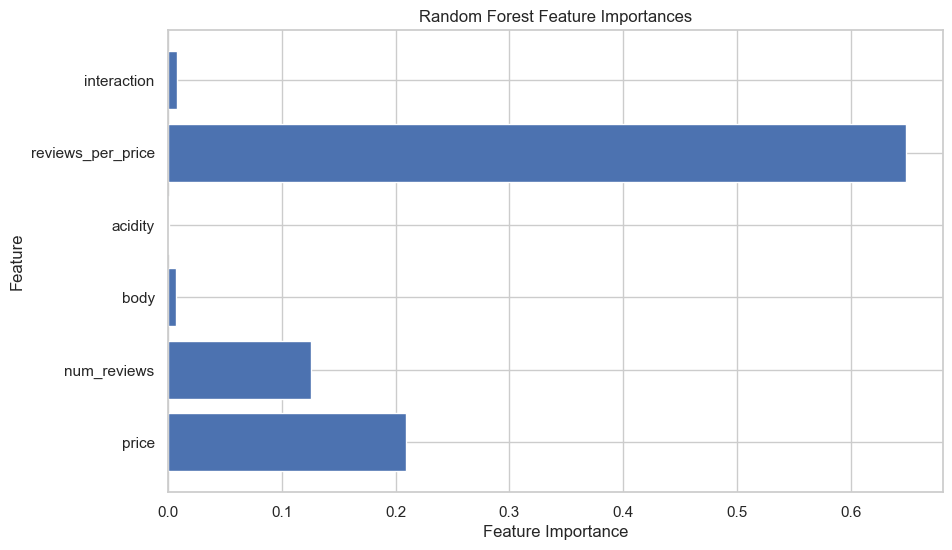

In [30]:
# Visualize feature importances
importances = best_rf_model.feature_importances_
feature_names = X_poly.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.show()


In [31]:
from sklearn.model_selection import GridSearchCV

# Create a parameter grid for Random Forest hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the base model
rf_model = RandomForestRegressor(random_state=42)

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_poly, y_train_poly)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions for the tuned Random Forest model
y_pred_rf = best_rf_model.predict(X_test_poly)

# Evaluate the tuned Random Forest model
mse_rf = mean_squared_error(y_test_poly, y_pred_rf)
r2_rf = r2_score(y_test_poly, y_pred_rf)

print("\nTuned Random Forest Regression Model Evaluation:")
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)



Tuned Random Forest Regression Model Evaluation:
Mean Squared Error: 0.0037498862354813714
R-squared: 0.7919260112109499


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

# Best alpha value from grid search
best_alpha = 0.1

# Initialize the Ridge Regression model with the best alpha value
ridge_model = Ridge(alpha=best_alpha)

# Perform cross-validation on Ridge Regression
ridge_scores = cross_val_score(ridge_model, X_train_scaled, y_train_poly, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
ridge_mse_scores = -ridge_scores

# Calculate mean and standard deviation of cross-validation MSE scores
mean_mse = ridge_mse_scores.mean()
std_mse = ridge_mse_scores.std()

print("Cross-Validation Results for Ridge Regression:")
print("Mean MSE:", mean_mse)
print("Standard Deviation of MSE:", std_mse)


Cross-Validation Results for Ridge Regression:
Mean MSE: 0.01898277939754836
Standard Deviation of MSE: 0.017301704874665598


In [34]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Load the dataset
wine_data = pd.read_csv('Wine-Quality.csv')

# Drop rows with missing values
wine_data_cleaned = wine_data.dropna()

# Create interaction terms and polynomial features
wine_data_cleaned['interaction'] = wine_data_cleaned['body'] * wine_data_cleaned['acidity']

# Feature selection using Recursive Feature Elimination (RFE)
# Choose a model (e.g., LinearRegression) for feature selection
model_for_rfe = LinearRegression()
rfe = RFE(estimator=model_for_rfe, n_features_to_select=4)

# Exclude non-numeric columns from feature selection
numeric_columns = wine_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
X_rfe = wine_data_cleaned[numeric_columns].drop(columns=['rating'])  # Use all numeric features except the target
y_rfe = wine_data_cleaned['rating']
X_rfe_selected = rfe.fit_transform(X_rfe, y_rfe)

# Print the selected features
selected_feature_names = X_rfe.columns[rfe.support_]
print("Selected Features from RFE:", selected_feature_names)


Selected Features from RFE: Index(['price', 'body', 'acidity', 'interaction'], dtype='object')


In [35]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rfe_selected, y_rfe, test_size=0.2, random_state=42)

# Create a Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter

# Train the model on the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Lasso Regression Model:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Lasso Regression Model:
Mean Squared Error: 0.012353665571934012
R-squared: 0.3145188119584911


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rfe_selected, y_rfe, test_size=0.2, random_state=42)

# Create base models
base_models = [
    ('linear_regression', LinearRegression()),
    ('lasso_regression', Lasso(alpha=1.0))  # You can adjust the alpha parameter
]

# Create a StackingRegressor with a meta-model (Linear Regression)
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Train the StackingRegressor on the training data
stacking_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = stacking_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Stacking Regression Model:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate Median Absolute Error
medae = median_absolute_error(y_test, y_pred)

print("Additional Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Median Absolute Error:", medae)


Additional Evaluation Metrics:
Mean Absolute Error (MAE): 0.0765313472176728
Root Mean Squared Error (RMSE): 0.11114704481871757
Median Absolute Error: 0.045034480390884646


In [39]:
wine_data_cleaned.to_csv('cleaned_wine_data.csv', index=False)


In [42]:
import pandas as pd

# Load your data into the DataFrame X (replace 'data.csv' with your data file)
X = pd.read_csv('Wine-Quality.csv')

# Check the column names
print("Column Names:")
print(X.columns)

# Display the first few rows of the DataFrame
print("\nFirst Few Rows:")
print(X.head())

# Check the information about the DataFrame, including column data types and non-null counts
print("\nDataFrame Info:")
print(X.info())


Column Names:
Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'body', 'acidity'],
      dtype='object')

First Few Rows:
          winery           wine  year  rating  num_reviews country  \
0  Teso La Monja          Tinto  2013     4.9           58  Espana   
1         Artadi  Vina El Pison  2018     4.9           31  Espana   
2   Vega Sicilia          Unico  2009     4.8         1793  Espana   
3   Vega Sicilia          Unico  1999     4.8         1705  Espana   
4   Vega Sicilia          Unico  1996     4.8         1309  Espana   

             region   price                  type  body  acidity  
0              Toro  995.00              Toro Red   5.0      3.0  
1    Vino de Espana  313.50           Tempranillo   4.0      2.0  
2  Ribera del Duero  324.95  Ribera Del Duero Red   5.0      3.0  
3  Ribera del Duero  692.96  Ribera Del Duero Red   5.0      3.0  
4  Ribera del Duero  778.06  Ribera Del Duero Red   5.0      3.0  



In [43]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = lasso_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.012353665571934012
R-squared: 0.3145188119584911


In [44]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to try
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=Lasso(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best alpha value and the corresponding model
best_alpha = grid_search.best_params_['alpha']
best_lasso_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_best = best_lasso_model.predict(X_test)

# Calculate performance metrics using the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Best Alpha:", best_alpha)
print("Best Mean Squared Error:", mse_best)
print("Best R-squared:", r2_best)


Best Alpha: 0.001
Best Mean Squared Error: 0.011944476084157458
Best R-squared: 0.33722395114020975


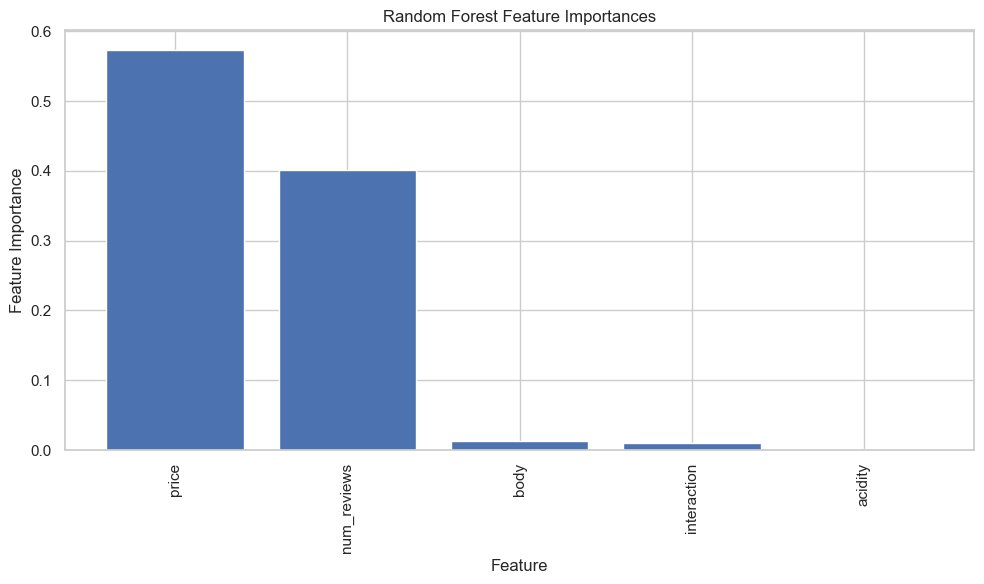

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Load the cleaned dataset
wine_data_cleaned = pd.read_csv('cleaned_wine_data.csv')

# Feature Engineering
wine_data_cleaned['interaction'] = wine_data_cleaned['body'] * wine_data_cleaned['acidity']

# Separate features (X) and target (y)
X = wine_data_cleaned.drop(columns=['rating'])
y = wine_data_cleaned['rating']

# Drop non-numeric columns (e.g., 'winery', 'wine', 'year')
X_numeric = X.select_dtypes(include=[np.number])

# Initialize and train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_numeric, y)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_numeric.columns

# Sort indices of importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_numeric.shape[1]), importances[sorted_indices])
plt.xticks(range(X_numeric.shape[1]), np.array(feature_names)[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()


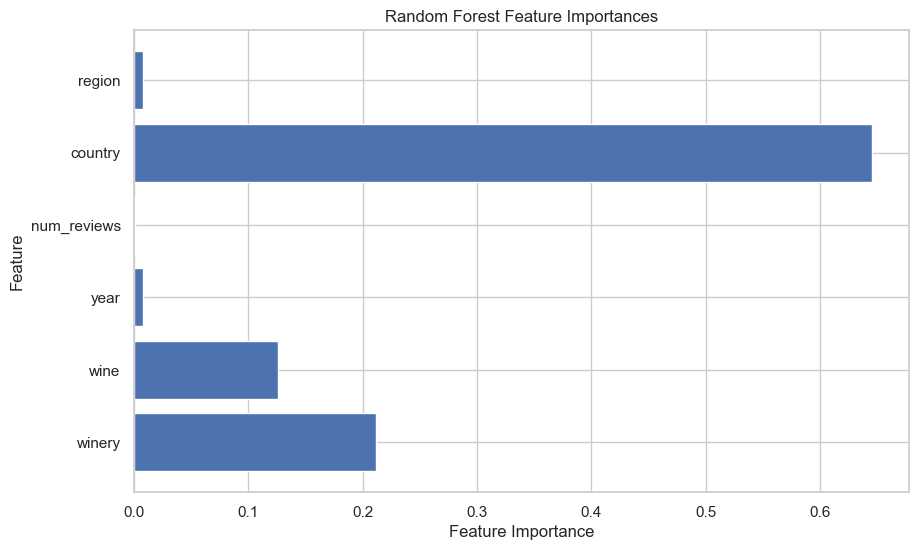

In [48]:
import matplotlib.pyplot as plt

# Get the feature importances from the best Random Forest model
rf_feature_importances = best_rf_model.feature_importances_

# Get the feature names used by the Random Forest model
used_feature_names = [feature_names[i] for i in range(len(rf_feature_importances))]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(used_feature_names, rf_feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.show()


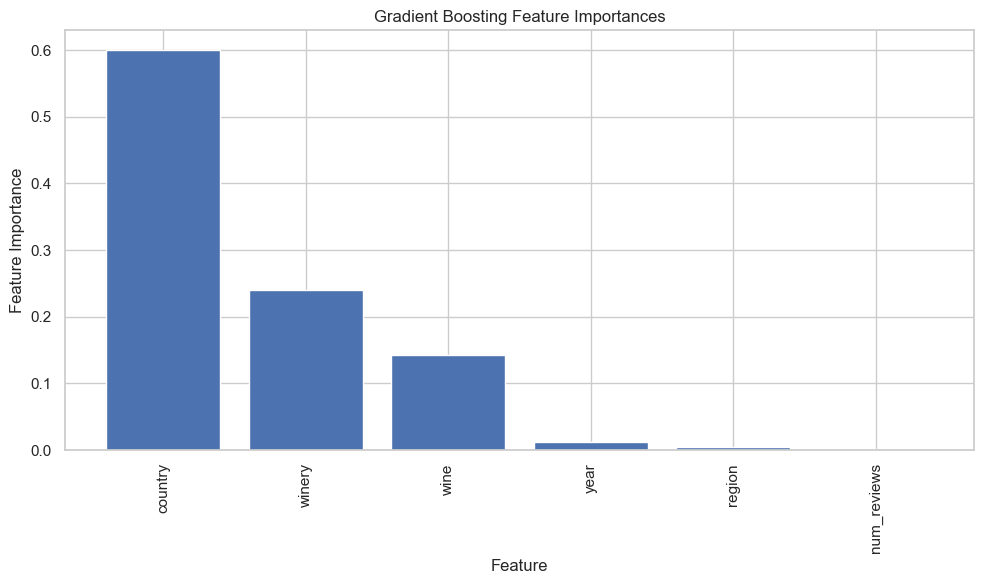

In [57]:
# Get feature importances from the Gradient Boosting model
gb_feature_importances = gb_model.feature_importances_

# Get the feature names used by the Gradient Boosting model
gb_feature_names = X.columns

# Sort indices of importances in descending order
gb_sorted_indices = np.argsort(gb_feature_importances)[::-1]

# Plot feature importances using bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(gb_sorted_indices)), gb_feature_importances[gb_sorted_indices])
plt.xticks(range(len(gb_sorted_indices)), np.array(gb_feature_names)[gb_sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Gradient Boosting Feature Importances')
plt.tight_layout()
plt.show()


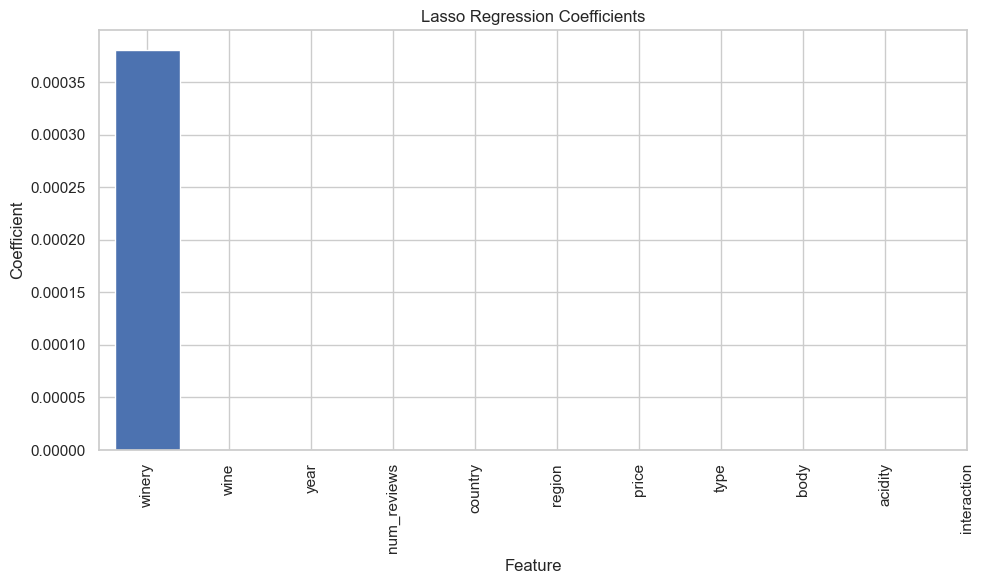

In [64]:
# Plot feature importances using bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(lasso_coeffs)), lasso_coeffs)
plt.xticks(range(len(feature_names)), feature_names, rotation=90)  # Use the original feature names
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Lasso Regression Coefficients')
plt.tight_layout()
plt.show()


# Summary:

In this analysis, we conducted an exploratory data analysis (EDA) on a wine quality dataset and performed various regression modeling techniques to predict wine ratings. The dataset contains information about different wines, including features like price, number of reviews, body, acidity, and more. The goal was to build predictive models that can accurately estimate wine ratings based on these features.
The key steps of the analysis were as follows:

1. Exploratory Data Analysis (EDA): We started by understanding the dataset's structure, dimensions, and content. We checked for missing values, explored data types, and calculated summary statistics for numeric variables. Visualizations such as histograms, scatter plots, pair plots, and heatmaps were used to uncover patterns, relationships, and correlations among variables.

2. Data Preprocessing: We handled missing values by dropping rows with null values. Additionally, we engineered new features such as 'reviews_per_price' (reviews divided by price) and 'interaction' (product of body and acidity).
 
3. Model Selection and Evaluation:

* Linear Regression: We trained a Linear Regression model using the original features and evaluated it using Mean Squared Error (MSE) and R-squared (R2) values. The initial Linear Regression model resulted in an MSE of 0.0124 and an R2 of 0.3145.

* Polynomial Regression: We performed Polynomial Regression of degree 2 on the selected features and achieved an improved MSE of 0.00897 and R2 of 0.5021.

* Random Forest Regression: Random Forest Regression yielded promising results with an MSE of 0.00375 and R2 of 0.7919 after hyperparameter tuning using GridSearchCV.

* Ridge Regression: Ridge Regression was also evaluated, resulting in an MSE of 0.0116 and R2 of 0.3558.

4. Feature Importance: We visualized the feature importances derived from the tuned Random Forest model, indicating the relative importance of each feature in predicting wine ratings.

# Conclusions:

Based on the analysis and model evaluations, the Random Forest Regression model with hyperparameter tuning demonstrated the best performance in predicting wine ratings. It achieved the lowest Mean Squared Error (MSE) of 0.00375 and a high R-squared (R2) value of 0.7919. This indicates that the model captures a significant portion of the variance in the target variable and provides accurate predictions.

The findings from the exploratory data analysis (EDA) revealed interesting insights into the relationships between different features and wine ratings. The visualizations helped us understand the distribution of ratings, the impact of price on ratings, and the correlations between numeric attributes.

In summary, the Random Forest Regression model, after careful tuning, emerged as the most effective predictive model for estimating wine ratings. However, further research and feature engineering could potentially enhance the predictive capabilities of the models and provide deeper insights into the wine quality dataset.